In [ ]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

iris = load_iris()


iris_data = pd.DataFrame(iris.data)
# sepal length (cm),  sepal width (cm),  petal length (cm),  petal width (cm)
#iris_data.columns = list(iris.feature_names)
iris_target = pd.DataFrame(iris.target)
print(iris_data)
#print(iris_target)
kn = KNeighborsClassifier()

plt.scatter(iris_data[0], iris_target)
plt.xlabel('data')
plt.ylabel('target')
plt.show()

kn.fit(iris_data, iris_target)
kn.score(iris_data, iris_target)



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

iris = sns.load_dataset('iris')
X = iris.drop('species', axis=1)
y = iris['species'].replace('setosa', 0).replace('versicolor', 1).replace('virginica', 2)

train_input, test_input, train_target, test_target = train_test_split(X, y,test_size=0.2, random_state=42)


from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3, include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(len(train_poly))
print(len(train_target))
print(len(test_poly))
print(len(test_target))

lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly) # 훈련 데이터로 한번만 fit진행. 테스트 데이터는 fit이 아닌 transform을 적용

train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

plt.scatter(train_scaled, train_target)
#plt.scaater(test_poly, test_target)
plt.show()

for i in range(len(X.columns)) :
    plt.scatter(train_scaled)

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


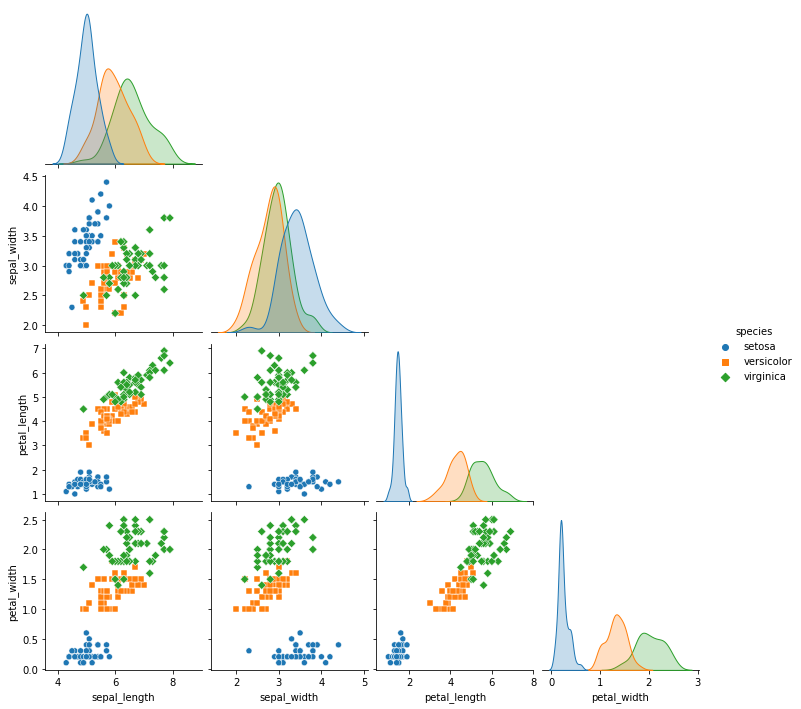

"\n# 산점도 (Scatter Plot)\nplt.figure(figsize=(10, 6))\nplt.subplot(2, 2, 1)\nplt.scatter(train_input['sepal_length'], train_target, color='blue', label='Train data')\nplt.scatter(test_input['sepal_length'], test_target, color='red', label='Test data')\nplt.xlabel('Sepal Length')\nplt.ylabel('Species')\nplt.legend()\nplt.title('Sepal Length vs Species')\n\nplt.subplot(2, 2, 2)\nplt.scatter(train_input['sepal_width'], train_target, color='blue', label='Train data')\nplt.scatter(test_input['sepal_width'], test_target, color='red', label='Test data')\nplt.xlabel('Sepal Width')\nplt.ylabel('Species')\nplt.legend()\nplt.title('Sepal Width vs Species')\n\nplt.subplot(2, 2, 3)\nplt.scatter(train_input['petal_length'], train_target, color='blue', label='Train data')\nplt.scatter(test_input['petal_length'], test_target, color='red', label='Test data')\nplt.xlabel('Petal Length')\nplt.ylabel('Species')\nplt.legend()\nplt.title('Petal Length vs Species')\n\nplt.subplot(2, 2, 4)\nplt.scatter(train_i

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

# 데이터셋 로드 및 전처리
iris = sns.load_dataset('iris')
X = iris.drop('species', axis=1)
y = iris['species'].replace('setosa', 0).replace('versicolor', 1).replace('virginica', 2)
print(iris)
train_input, test_input, train_target, test_target = train_test_split(X, y, test_size=0.2, random_state=42)

poly = PolynomialFeatures(degree=3, include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

lr = LinearRegression()
lr.fit(train_poly, train_target)

ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

# 페어플롯 (Pair Plot)
sns.pairplot(iris, hue='species', markers=["o", "s", "D"], corner=True)
plt.show()
'''
# 산점도 (Scatter Plot)
plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
plt.scatter(train_input['sepal_length'], train_target, color='blue', label='Train data')
plt.scatter(test_input['sepal_length'], test_target, color='red', label='Test data')
plt.xlabel('Sepal Length')
plt.ylabel('Species')
plt.legend()
plt.title('Sepal Length vs Species')

plt.subplot(2, 2, 2)
plt.scatter(train_input['sepal_width'], train_target, color='blue', label='Train data')
plt.scatter(test_input['sepal_width'], test_target, color='red', label='Test data')
plt.xlabel('Sepal Width')
plt.ylabel('Species')
plt.legend()
plt.title('Sepal Width vs Species')

plt.subplot(2, 2, 3)
plt.scatter(train_input['petal_length'], train_target, color='blue', label='Train data')
plt.scatter(test_input['petal_length'], test_target, color='red', label='Test data')
plt.xlabel('Petal Length')
plt.ylabel('Species')
plt.legend()
plt.title('Petal Length vs Species')

plt.subplot(2, 2, 4)
plt.scatter(train_input['petal_width'], train_target, color='blue', label='Train data')
plt.scatter(test_input['petal_width'], test_target, color='red', label='Test data')
plt.xlabel('Petal Width')
plt.ylabel('Species')
plt.legend()
plt.title('Petal Width vs Species')

plt.tight_layout()
plt.show()



# 상관 행렬 히트맵 (Correlation Matrix Heatmap)
plt.figure(figsize=(10, 8))
corr_matrix = iris.drop('species', axis=1).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

# 히스토그램 (Histogram)
iris.drop('species', axis=1).hist(bins=20, figsize=(10, 8), edgecolor='black')
plt.suptitle('Feature Distributions', fontsize=16)
plt.show()

# 박스플롯 (Box Plot)
plt.figure(figsize=(12, 8))
sns.boxplot(data=iris.drop('species', axis=1))
plt.title('Box Plot of Features')
plt.show()'''